# $\mathcal{H}(2^3)$ Branching Occurs Over Three 2-Torsion Points

This notebook addresses the case where three of the $2$-torsion points have a double zero above them.  We arrange the surface so that each of $(0,0)$ and $(1,0)$ have a double zero above them.

We recall that in $\mathcal{H}(2^3)$, $d_{opt} = 3$.

In [1]:
import re

## Step 1

In [2]:
#This loads all of the 1-cylinder diagrams in (all connected components of the stratum) H(2,2) formatted as python lists

H2_2_cyl_diags = [[[[0, 5, 3, 1, 2, 4], [0, 5, 3, 1, 2, 4]]], 
                  [[[0, 5, 2, 1, 4, 3], [0, 4, 2, 1, 5, 3]]], 
                  [[[0, 5, 2, 3, 1, 4], [0, 3, 1, 5, 2, 4]]], 
                  [[[0, 5, 3, 2, 1, 4], [0, 1, 3, 4, 5, 2]]]]

H2_cyl_diags = [[[[0, 1, 2], [0, 1, 2]]]]


#This loads all of the functions for processing cylinder diagrams

#Only the general cylinder diagram functions are needed in this case
%run ./ST5_fcns/cyl_diag_fcns.ipynb

#In the previous case finding a simple zero sufficed to extract potential odd length saddle connections
#In this case it's the switch from one zero to another that marks an odd saddle connection

def extract_switch(cyl_bot_int):
#    print(cyl_bot_int)
    length = len(cyl_bot_int)
    switch_list = []
    for i in enumerate(cyl_bot_int):
        if i[1] == cyl_bot_int[(i[0]+1)%length]:
            switch_list += [0]
        else:
            switch_list += [1]
    return switch_list

def strat_odd_sc_2t4_3_branch_points(master_list):
    #This is the main function to run to get the processed data
    #The data consists of 
    total = []
    for i in master_list:
        print(i, ' from master')
        cyl_bot = vertex_labels(i)[0][0]
        print(cyl_bot)
        cyl_bot_int = [int(j[1:]) for j in cyl_bot]
        for vertex in range(3):
            fake_labels = []
            for vert_copy in cyl_bot_int:
                if vert_copy == vertex:
                    fake_labels += [0]
                else:
                    fake_labels += [1]
            print(fake_labels)
            total.append((i,[extract_switch(fake_labels)]))
    return total

In [3]:
#This runs instantly and constructs all of the binary lists
#we may have to 

H2_2_vertex_data = strat_odd_sc_2t4_3_branch_points(H2_2_cyl_diags)

([[[0, 5, 3, 1, 2, 4], [0, 5, 3, 1, 2, 4]]], ' from master')
['V0', 'V1', 'V0', 'V1', 'V0', 'V1']
[0, 1, 0, 1, 0, 1]
[1, 0, 1, 0, 1, 0]
[1, 1, 1, 1, 1, 1]
([[[0, 5, 2, 1, 4, 3], [0, 4, 2, 1, 5, 3]]], ' from master')
['V0', 'V0', 'V1', 'V1', 'V1', 'V0']
[0, 0, 1, 1, 1, 0]
[1, 1, 0, 0, 0, 1]
[1, 1, 1, 1, 1, 1]
([[[0, 5, 2, 3, 1, 4], [0, 3, 1, 5, 2, 4]]], ' from master')
['V0', 'V1', 'V0', 'V1', 'V0', 'V1']
[0, 1, 0, 1, 0, 1]
[1, 0, 1, 0, 1, 0]
[1, 1, 1, 1, 1, 1]
([[[0, 5, 3, 2, 1, 4], [0, 1, 3, 4, 5, 2]]], ' from master')
['V0', 'V1', 'V0', 'V1', 'V1', 'V0']
[0, 1, 0, 1, 1, 0]
[1, 0, 1, 0, 0, 1]
[1, 1, 1, 1, 1, 1]


There are unique partitions of $6$ into $6$ numbers and into $3$ even numbers.

## Step 2

In [4]:
def partition_pre(n, d, t_max = None, depth=0):
    #Function pulled from https://stackoverflow.com/questions/10035752/elegant-python-code-for-integer-partitioning
    #Written by Nico Schlömer
    if t_max == None:
        t_max = n+1
    if d == depth:
        return [[]]
    return [
        item + [i]
        for i in range(1,min(n+1,t_max+1))
        for item in partition_pre(n-i, d, t_max = t_max, depth=depth+1)
        ]

def t_max_check(part, t_max):
    for j in part:
        if j > t_max:
            return False
    return True

def partition(n, d, t_max):
    #Function pulled from https://stackoverflow.com/questions/10035752/elegant-python-code-for-integer-partitioning
    #Written by Nico Schlömer
    #Key in the if statement below is that the functions are sorted in terms of computational complexity
    #The fastest check is performed first and the most intensive last
    return [[n-sum(p)] + p for p in partition_pre(n-1, d-1, t_max = t_max) 
            if t_max_check([n-sum(p)] + p, t_max)]

def odd_number_count_check(part):
    if sum([j%2 for j in part]) >= 2:
        return True
    else:
        return False

def create_sc_partition_file_big_tuple(t_tuple_begin, d_opt, part_length, filename_root):
    width = 2*d_opt
    t_list_begin = list(t_tuple_begin)
    n = width - sum(t_list_begin)
    d = part_length-len(t_list_begin)
    end_part_list = partition(n, d, t_max = t_list_begin[0])
    part_list = [tuple(t_list_begin + part) for part in end_part_list 
                 if odd_number_count_check(t_list_begin + part)]
    file_tag = ''
    for t in t_list_begin:
        file_tag += str(t) + '_'
    file_tag = file_tag[:-1]
    filename = filename_root + file_tag
    with open(filename, 'w') as file:
        file.write(str(part_list))
    print(filename + ' written')
    return 'done'

def create_sc_partition_file(t_tuple_begin, d_opt, part_length, filename_root, t0_range):
    width = 2*d_opt
    try:
        t_tuple_begin_list = list(t_tuple_begin)
    except:
        t_tuple_begin_list = [int(t_tuple_begin)]
    if len(t_tuple_begin_list) > 0:
        return create_sc_partition_file_big_tuple(t_tuple_begin_list, width, part_length, filename_root)
    else:
        total = []
        for t0 in t0_range:
            t_list_begin = [t0]
            n = width - t0
            d = part_length - 1
            end_part_list = partition(n, d, t_max = t_list_begin[0])
            part_list = [tuple(t_list_begin + part) for part in end_part_list 
                         if odd_number_count_check(t_list_begin + part)]
            total += part_list
        with open(filename_root, 'w') as file:
            file.write(str(total))
        print(filename_root + ' written')
        return 'done'

In [5]:
if True:
    create_sc_partition_file((), part_length = 6, t0_range = [1], d_opt = 3,
                             filename_root = 'ST5_data//H_2t3//3_branch_point//partitions//H2_2_part')

#Load the partitions

if True:
    with open('ST5_data//H_2t3//3_branch_point//partitions//H2_2_part', 'r') as file:
        H2_2_part = eval(file.read())

H2_part = [(2, 2, 2)]

ST5_data//H_2t3//3_branch_point//partitions//H2_2_part written


In [6]:
#This constructs this list by hand.
H2_vertex_data = [(H2_cyl_diags[0], [[0]*3])]

## Step 3

In [7]:
#This loads all of the align_list functions needed for nearly every case
#This includes the align_list evaluate function

%run ./ST5_fcns/align_list_fcns.ipynb

if True:
    for t in [1]:
        align_list_write_file(H2_2_part, H2_2_vertex_data, 
                              'ST5_data//H_2t3//3_branch_point//align_list//H_2_2_align_list', 
                              t0 = t)

if True:
    align_list_write_file(H2_part, H2_vertex_data, 
                          'ST5_data//H_2t3//3_branch_point//align_list//H_2_align_list', 
                          t0 = 2)

        
if False:
    align_list = [(H2_part[0], H2_cyl_diags[0])]
    with open('ST5_data//H_2t3//3_branch_point//align_list//H_2_align_list_2', 'w') as file:
        file.write(str(align_list))

1 partitions to search
1 partitions to search


## Step 4

In [8]:
#This loads all of the visible_align_list functions needed for nearly every case

%run ./ST5_fcns/align_list_visible_fcns.ipynb

if True:
    generate_all_align_list_visible_files([2], [1], 3, 
                                          'ST5_data//H_2t3//3_branch_point//', 
                                          'align_list//H_2_2_align_list_', 
                                          'align_list_visible//H_2_2_align_list_')

if True:
    generate_all_align_list_visible_files([1], [2], 3, 
                                          'ST5_data//H_2t3//3_branch_point//', 
                                          'align_list//H_2_align_list_', 
                                          'align_list_visible//H_2_align_list_')

total_list generated
ST5_data//H_2t3//3_branch_point//align_list//H_2_2_align_list_1 read
4 configurations to search
ST5_data//H_2t3//3_branch_point//align_list_visible//H_2_2_align_list_1_visible_2 written
total_list generated
ST5_data//H_2t3//3_branch_point//align_list//H_2_align_list_2 read
1 configurations to search
ST5_data//H_2t3//3_branch_point//align_list_visible//H_2_align_list_2_visible_1 written


## Step 5

In [9]:
#At this point, none of the files above need to be loaded for this to run.
#Once the files above are generated, the file sizes are small enough that these can be loaded on the fly.

#This loads all of the visible_align_list functions needed for nearly every case

%run ./ST5_fcns/combine_align_list_visible_fcns.ipynb

if True:
    combine_align_list_visible_write_file(s_range = [2], 
                                          s_filename_root = 'align_list_visible//H_2_align_list_', 
                                          t_range = [1], 
                                          t_filename_root = 'align_list_visible//H_2_2_align_list_',
                                          d_opt = 3, 
                                          root_dir = 'ST5_data//H_2t3//3_branch_point//')

ST5_data//H_2t3//3_branch_point//align_list_visible//H_2_2_align_list_1_visible_2 read
ST5_data//H_2t3//3_branch_point//align_list_visible//H_2_align_list_2_visible_1 read
12*3=36 combinations to check
admissible_list written with 36 elements


## Step 6

In [10]:
#This loads all of the vertical permutation check functions needed for nearly every case
#This function can be run once admissible_list is written and without needing to load any other file

%run ./ST5_fcns/vert_perm_check_fcns.ipynb

if True:
    vert_perm_check_file(3, 'ST5_data//H_2t3//3_branch_point//')

admissible_list read with 36 candidates
admissible_list_vert_perm_check written with 36 elements


In [11]:
#This checks that all (both) of the vertical permutations have the correct length of 2*d_opt

if True:
    all_vert_perm_check_file(3, 'ST5_data//H_2t3//3_branch_point//')

admissible_list_vert_perm_check read with 36 candidates
admissible_list_all_vert_perm_check written with 36 elements


## Step 7

In [12]:
%run ./ST5_fcns/slope_test_fcn.ipynb

In [13]:
if True:
    final_list = slope_test(3, 'ST5_data//H_2t3//3_branch_point//')

admissible_list_all_vert_perm_check read with 36 candidates
vert_perm_total_1 produced with 36 elements
vert_perm_total_2 produced with 36 elements
vert_perm_total_d_opt produced with 36 elements


## Step 8

In [14]:
def make_origamis(d_opt, filename_root):
    admissible_list_vert_perm_check_filename = filename_root + 'admissible_list_all_vert_perm_check'
    with open(admissible_list_vert_perm_check_filename, 'r') as file:
        admissible_list_all_vert_perm_check = eval(file.read())
        print('admissible_list_all_vert_perm_check read with ' 
              + str(len(admissible_list_all_vert_perm_check)) + ' candidates')
    vert_perm_total = []
    for surf_coord in admissible_list_all_vert_perm_check:
        vert_perms = all_vert_perm_check(surf_coord, 3, trigger_check = False)
        vert_perm_total.append([tuple(i) for i in vert_perms])
    return vert_perm_total

In [15]:
total_list = make_origamis(3, 'ST5_data//H_2t3//3_branch_point//')

admissible_list_all_vert_perm_check read with 36 candidates


In [16]:
from surface_dynamics.all import *

def origami_from_list(j, d_opt = 3):
    h = str(tuple(range(1,2*d_opt+1))) + str(tuple(range(2*d_opt+1, 4*d_opt+1)))
    v = str(total_list[j][0]) + str(total_list[j][1])
    return Origami(h,v)

In [17]:
o1 = origami_from_list(0)
reduced_list = [o1]
for j in range(1,36):
    o2 = origami_from_list(j)
    if not (o1.is_isomorphic(o2) and o2.is_isomorphic(o1)):
        reduced_list += [o2]

reduced_list

[(1,2,3,4,5,6)(7,8,9,10,11,12)
 (1,7,5,9,3,11)(2,8,4,12,6,10)]

Stratum is H_4(2^3)
Sum of Lyapunov exponents is 1


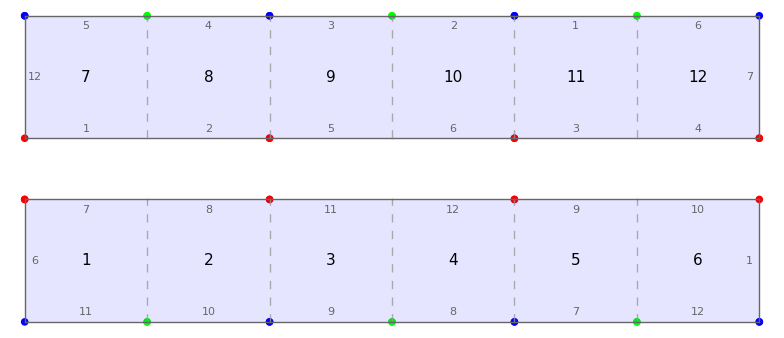

In [18]:
for surface in reduced_list:
    print('Stratum is ' + str(surface.stratum()))
    print('Sum of Lyapunov exponents is ' + str(surface.sum_of_lyapunov_exponents()))
    surface.show()